In [12]:
import pandas as pd
df = pd.read_csv("cph_pop_and_access_1k.csv")
df.head()

,id,lon,lat,population_density,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
0,55246,12.527917,55.695417,8509.044922,826.561404,920.052632,1000.000000,939.964912,1000.0,813.596491
1,55247,12.536250,55.695417,11358.980469,535.344828,590.942529,904.540230,600.655172,1000.0,963.563218
2,55248,12.544583,55.695417,12426.899414,181.544304,177.734177,496.367089,341.354430,1000.0,1000.000000
3,55249,12.552917,55.695417,12974.911133,157.525773,225.360825,759.319588,401.371134,1000.0,1000.000000
4,55250,12.561250,55.695417,9767.416016,222.821429,221.107143,991.223214,186.000000,1000.0,1000.000000


In [13]:
df["avg_user_selection"] = 0

In [14]:
user_selected_amenities = ["avg_restaurant_dist", "avg_bar_dist", "avg_toilets_dist"]

df["avg_user_selection"] = (df[user_selected_amenities[0]] + df[user_selected_amenities[1]] + df[user_selected_amenities[2]])/len(user_selected_amenities)

df

,id,lon,lat,population_density,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist,avg_user_selection
0,55246,12.527917,55.695417,8509.044922,826.561404,920.052632,1000.000000,939.964912,1000.0,813.596491,895.526316
1,55247,12.536250,55.695417,11358.980469,535.344828,590.942529,904.540230,600.655172,1000.0,963.563218,575.647510
2,55248,12.544583,55.695417,12426.899414,181.544304,177.734177,496.367089,341.354430,1000.0,1000.000000,233.544304
3,55249,12.552917,55.695417,12974.911133,157.525773,225.360825,759.319588,401.371134,1000.0,1000.000000,261.419244
4,55250,12.561250,55.695417,9767.416016,222.821429,221.107143,991.223214,186.000000,1000.0,1000.000000,209.976190
...,...,...,...,...,...,...,...,...,...,...,...
127,59706,12.577917,55.603750,655.886902,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
128,59707,12.586250,55.603750,928.264771,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
129,59708,12.594583,55.603750,411.116058,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
130,59709,12.602917,55.603750,192.624252,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000


In [15]:
sample = df[["population_density", "avg_user_selection"]]
sample.head()

,population_density,avg_user_selection
0,8509.044922,895.526316
1,11358.980469,575.647510
2,12426.899414,233.544304
3,12974.911133,261.419244
4,9767.416016,209.976190


In [16]:
sample = sample.fillna(1000)

In [17]:
# Scale(normalize) the data attributes between 0-1

from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = sample.columns
d = scaler.fit_transform(sample)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,population_density,avg_user_selection
0,0.642317,0.882342
1,0.858345,0.522096
2,0.939294,0.136821
3,0.980834,0.168214
4,0.737703,0.110279


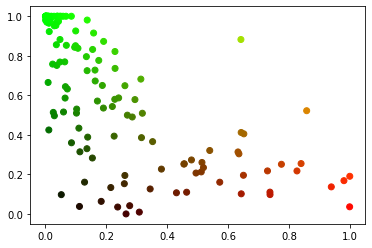

In [18]:
# Color mapping method to check if scaling worked correctly. 
# It would be great to implement this color scheme on the map! 

import numpy as np
import matplotlib.pyplot as plt 
# points = sample.to_numpy()
points = scaled_df.to_numpy()

R = (points[:,0] - points[:,0].min())/(points[:,0].max()-points[:,0].min())
G = (points[:,1] - points[:,1].min())/(points[:,1].max()-points[:,1].min())
B = np.zeros(R.shape)

clrs = np.column_stack((R,G,B))

plt.scatter(points[:,0],points[:,1],color=clrs)
plt.show()

In [19]:
# Adding scaled data rows in the original data frame 

df['scaled_pop'] = scaled_df['population_density']
df['scaled_acc'] = scaled_df['avg_user_selection']

In [23]:
scaled_df.head()

,population_density,avg_user_selection
0,0.642317,0.882342
1,0.858345,0.522096
2,0.939294,0.136821
3,0.980834,0.168214
4,0.737703,0.110279


In [29]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(scaled_df.T))

In [30]:
eig_vals[1] / sum(eig_vals)

0.852406699676595

In [32]:
projected_X = scaled_df.dot(eig_vecs.T[1])
projected_X

0     -0.365041
1      0.054249
2      0.417863
3      0.415434
4      0.325853
         ...   
127   -0.798476
128   -0.786810
129   -0.808960
130   -0.818318
131   -0.821292
Length: 132, dtype: float64

In [54]:
df['PCA'] = projected_X
df['modifiedPCA'] = projected_X + 1
df['modifiedQuadrant'] = df['quadrant'] * 2 
df['y_axis'] = 0.0
df.head()

,id,lon,lat,population_density,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist,avg_user_selection,scaled_pop,scaled_acc,quadrant,PCA,y_axis,modifiedPCA,modifiedQudrant,modifiedQuadrant
0,55246,12.527917,55.695417,8509.044922,826.561404,920.052632,1000.000000,939.964912,1000.0,813.596491,895.526316,0.642317,0.882342,1,-0.365041,0.0,0.634959,0.5,2
1,55247,12.536250,55.695417,11358.980469,535.344828,590.942529,904.540230,600.655172,1000.0,963.563218,575.647510,0.858345,0.522096,1,0.054249,0.0,1.054249,0.5,2
2,55248,12.544583,55.695417,12426.899414,181.544304,177.734177,496.367089,341.354430,1000.0,1000.000000,233.544304,0.939294,0.136821,4,0.417863,0.0,1.417863,2.0,8
3,55249,12.552917,55.695417,12974.911133,157.525773,225.360825,759.319588,401.371134,1000.0,1000.000000,261.419244,0.980834,0.168214,4,0.415434,0.0,1.415434,2.0,8
4,55250,12.561250,55.695417,9767.416016,222.821429,221.107143,991.223214,186.000000,1000.0,1000.000000,209.976190,0.737703,0.110279,4,0.325853,0.0,1.325853,2.0,8


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



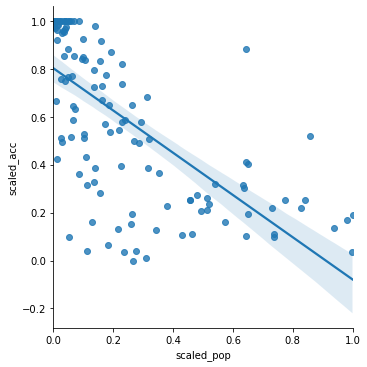

In [59]:
import seaborn as sns

sns.lmplot('scaled_pop', 'scaled_acc', data=df)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



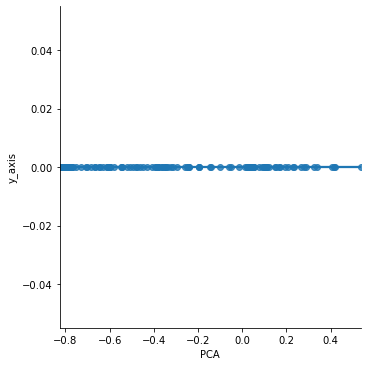

In [38]:
sns.lmplot('PCA', 'y_axis', data=df)

In [47]:
# Manually dividing quadrant, put the result in a seperate row
# ...there should be better way to do this 

df.loc[(df['scaled_pop'] > 0.5) & (df['scaled_acc'] > 0.5), 'quadrant'] = 1 
df.loc[(df['scaled_pop'] <= 0.5) & (df['scaled_acc'] > 0.5), 'quadrant'] = 2 
df.loc[(df['scaled_pop'] <= 0.5) & (df['scaled_acc'] <= 0.5), 'quadrant'] = 3 
df.loc[(df['scaled_pop'] > 0.5) & (df['scaled_acc'] <= 0.5), 'quadrant'] = 4 

df.to_csv("visualization.csv")

In [60]:
import plotly.express as px
 
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(
        df, 
        lon="lon", lat="lat", 
        hover_data=["population_density"] + user_selected_amenities,
        color="PCA",
        # color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.show()

In [61]:
import plotly.express as px
 
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(
        df, 
        lon="lon", lat="lat", 
        hover_data=["population_density"] + user_selected_amenities,
        color="quadrant",
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.show()